In [67]:
# Import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import os, os.path as osp

import nltk  #to install: activate ada,   conda install -c anaconda nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string


In [68]:
meat_products = ['steak','lamb', 'beef', 'cheese', 'pork', 'turkey', 'chicken', 'tuna', 'egg']


In [69]:
#Import CSV
DATA_FOLDER='data'
df=pd.read_csv(DATA_FOLDER+'/recipes_data.csv')
df
#recipes_df[recipes_df['Has meat']].count()
#74 out of the first 200 recipes have recognized formats.
#45 out of these 74 have "meat" ingredients


,Recipe Title,Has meat,Meat types,Meat quantity (kg),Carbon footprint,Rating,Website
0,French Dip Sandwiches Recipe : Rachael Ray : R...,True,"['beef', 'beef', 'beef']","[0.0, 0.17006802721088435, 0.0]",4.591837,5.00,food network
1,Apple Brown Betty Recipe | MyRecipes.com,False,[],0,0.000000,NaN,myrecipes
2,Roasted Potatoes with North Indian Spices Reci...,False,[],0,0.000000,NaN,myrecipes
3,\r\n\tBaked Buffalo Wings Recipe - Allrecipes....,True,['chicken'],[0.0],0.000000,4.40,allrecipes
4,Baked Lemon-Garlic Chicken with Bell Peppers R...,True,"['chicken', 'chicken']","[0.24499595756670015, 0.24499595756670015]",3.380944,NaN,myrecipes
5,\r\n\tFast Rice Pudding Recipe - Allrecipes.co...,False,[],0,0.000000,4.10,allrecipes
6,Mississippi Mud Pie Recipe | MyRecipes.com,True,['egg'],[0.002181818181818182],0.010473,NaN,myrecipes
7,\r\n\tChicken Breast Cutlets with Artichokes a...,True,"['chicken', 'chicken']","[0.1511715797430083, 0.0]",1.043084,4.40,allrecipes
8,\r\n\tBest Ever Popcorn Balls Recipe - Allreci...,False,[],0,0.000000,4.40,allrecipes
9,Pumpkin Oatmeal Recipe : Aarti Sequeira : Reci...,False,[],0,0.000000,5.00,food network


### Data Cleaning
Although we did most of the data cleaning in the previous notebook, we still need to clean out titles from the CSV file, annd remove outliers or other discrepancies that arose when analysing the data from our csv file.

In [73]:
#Remove the '\n' and '\t' left out of the DF -> CSV -> DF conversion
df_cleaned = df.copy()
df_cleaned['Recipe Title'] = df_cleaned['Recipe Title'].str.replace('\n', '')
df_cleaned['Recipe Title'] = df_cleaned['Recipe Title'].str.replace('\t', '')
df_cleaned['Recipe Title'] = df_cleaned['Recipe Title'].str.replace('\r', '')

In [ ]:
#create a df with weird values (no carboot footprint for recipe with meat ingredients or unreasonably large amount)
#assign a median carbon footprint value per ingredient to these recipes

In [ ]:
#df_outliers = df_outliers.append()

In [76]:
#sort dataframe
df_sorted_meat = df_cleaned.sort_values(['Carbon footprint'], ascending=False)

In [75]:
#manually remove outliers, to be replaced with a threshold check
#df_sorted_meat = df_sorted_meat.drop(df_sorted_meat.index[0:2])
df_sorted_meat.head(5)

,Recipe Title,Has meat,Meat types,Meat quantity (kg),Carbon footprint,Rating,Website
138,"Jerky Lover's Jerky - Sweet, Hot and Spicy! Re...",True,['beef'],[1.1337868480725624],30.612245,4.7,allrecipes
153,Maple Baked Pork Loin Roast Recipe - Allrecipe...,True,['pork'],[2.2675736961451247],27.437642,4.5,allrecipes
336,Dan's Fallin' Apart Pork Pot Roast with Cracke...,True,['pork'],[2.0408163265306123],24.693878,4.4,allrecipes
52,Leg o' Lamb with Lemon and Rosemary Recipe - A...,True,['lamb'],[0.3968253968253968],15.555556,5.0,allrecipes
119,Grilled Rib-Eye Steaks with Parsley-Garlic But...,True,['beef'],[0.41572184429327286],11.224490,5.0,epicurious


In [62]:
#remove all non-meat ingredients
df_sorted_meat = df_sorted_meat[df_sorted_meat['Has meat'] == True]

In [77]:
df_sorted_meat

,Recipe Title,Has meat,Meat types,Meat quantity (kg),Carbon footprint,Rating,Website
83,Easy Beginner's Turkey with Stuffing Recipe - ...,True,['turkey'],[5.442176870748299],59.319728,4.60,allrecipes
32,Grilled Tuna Recipe - Allrecipes.com,True,"['beef', 'tuna']","[1.2471655328798186, 1.2471655328798186]",41.281179,4.60,allrecipes
138,"Jerky Lover's Jerky - Sweet, Hot and Spicy! Re...",True,['beef'],[1.1337868480725624],30.612245,4.70,allrecipes
153,Maple Baked Pork Loin Roast Recipe - Allrecipe...,True,['pork'],[2.2675736961451247],27.437642,4.50,allrecipes
336,Dan's Fallin' Apart Pork Pot Roast with Cracke...,True,['pork'],[2.0408163265306123],24.693878,4.40,allrecipes
52,Leg o' Lamb with Lemon and Rosemary Recipe - A...,True,['lamb'],[0.3968253968253968],15.555556,5.00,allrecipes
119,Grilled Rib-Eye Steaks with Parsley-Garlic But...,True,['beef'],[0.41572184429327286],11.224490,5.00,epicurious
346,Hawaiian BBQ Pulled Pork Sandwich with Grilled...,True,['pork'],[0.6802721088435374],8.231293,5.00,food network
206,Classic Meat Loaf Recipe | MyRecipes.com,True,"['beef', 'pork', 'egg']","[0.2834467120181406, 0.021262119408062594, 0.0...",7.917533,NaN,myrecipes
271,The Ultimate Pork Crown Roast Recipe : Tyler F...,True,['pork'],[0.6279434850863422],7.598116,4.00,food network


In [ ]:
df_cleaned

### Basic analysis


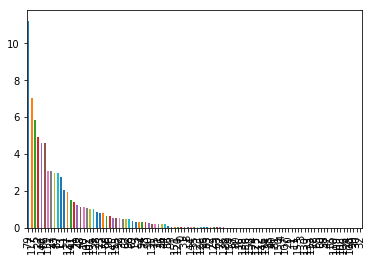

In [66]:
#df_sorted = df.sort_values(['Carbon footprint'], ascending=False)
df_sorted_meat['Carbon footprint'].plot(kind='bar',x='recipe',y='Carbon footprint')

In [24]:
df_sorted.head(5)

,Recipe Title,Has meat,Meat types,Meat quantity (kg),Carbon footprint,Rating
38,\n\tEasy Meatballs Recipe from Betty Crocker\n,True,"['beef', 'egg']","[9.183673469387754, 0.0015]",247.966384,NaN
119,"\n\tJerky Lover's Jerky - Sweet, Hot and Spicy...",True,['beef'],[1.1337868480725624],30.612245,4.7
79,\n\n\n\n\n\n\n\n\n\nGrilled Rib-Eye Steaks wit...,True,['beef'],[0.41572184429327286],11.224490,5.0
117,\n\tNo Tomato Chili Recipe - Allrecipes.com\n,True,"['beef', 'beef', 'cheese']","[0.1889644746787604, 0.07087373136020865, 0.0]",7.015632,4.4
5,\n\n\n\n\n\n\n\n\n\nHarissa-Crusted Tri-Tip Ro...,True,['beef'],[0.21541950113378686],5.816327,4.4


### Clustering 

In [ ]:

#remove website and meat value from title (NEEDED FOR CLUSTERING)
def tolkenize_title(title_str, recipe_site):
    """
    
    input:
    title_str = full recipe title
    recipe_site = website where recipe is from
    output:
    word_tokens = only the relevant keywords from the title (excluding website, stopwords, punctuation and meat keywords)
    
    """
    #make title lowercase
    title_str=title_str.casefold()
    
    #remove recipe site
    title_str=re.sub(recipe_site,'',title_str)
    title_str=re.sub('.com', '',title_str)
    title_str=re.sub('recipe', '',title_str)
    if 'betty' in title_str: #betty crocker has the form 'bettycrocker' and 'betty crocker'
        title_str=re.sub('bettycrocker','', title_str)
        
    #remove meat products from title to avoid clustering meat with meat....MAYBE WE SHOULDN'T DO THIS..?
    for i in meat_products:
        title_str=re.sub(i, '',title_str)
    
    #remove punctuation
    title_str="".join((char for char in title_str if char not in string.punctuation))

    stop_words=set(stopwords.words('english'))
    word_tokens = word_tokenize(title_str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    
    #print('word tokens=',word_tokens) 
    #print('filtered sentence = ',filtered_sentence) 
    #print('title str = ',title_str)

    return filtered_sentence

tolkenize_title('the Simple Collard Chicken of !! Greens Recipe | BettyCrocker.com', 'betty crocker')
    
    
    

In [ ]:
#transfer corpus into vector space

#calculating distance between each title as a measure of similarity

#clustering the documents using the k-means algorithm


#using multidimensional scaling to reduce dimensionality within the corpus
